In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("loan_approval_data.csv")

## Data Analysis

In [21]:
df.sample(5)

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
640,641.0,14891.0,9710.0,Unemployed,39.0,Married,0.0,728.0,1.0,0.56,11744.0,1816.0,NaN,24.0,Home,Rural,Graduate,Female,Private,No
648,649.0,NaN,NaN,NaN,NaN,Married,2.0,NaN,2.0,0.57,10268.0,44498.0,24925.0,NaN,Personal,Semiurban,Graduate,Male,Business,No
600,601.0,15051.0,9235.0,Contract,35.0,Married,0.0,756.0,2.0,0.24,3891.0,27301.0,25824.0,84.0,Education,Urban,NaN,Male,Private,Yes
559,560.0,10175.0,4356.0,Salaried,54.0,Married,NaN,631.0,0.0,0.40,17273.0,46870.0,39551.0,72.0,Personal,Urban,Graduate,Female,Private,No
739,NaN,15234.0,4445.0,Unemployed,41.0,Single,1.0,590.0,2.0,0.15,14925.0,20312.0,7608.0,24.0,Education,Urban,NaN,Male,MNC,No


In [22]:
df.shape

(1000, 20)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [24]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


In [25]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

## Data Preprocessing

In [26]:
num_columns = df.select_dtypes(include=["float64"]).columns
obj_columns = df.select_dtypes(include=["object"]).columns

In [27]:
from sklearn.impute import SimpleImputer

num_mean = SimpleImputer(strategy='mean')
df[num_columns] = num_mean.fit_transform(df[num_columns])

obj_max = SimpleImputer(strategy='most_frequent')
df[obj_columns] = obj_max.fit_transform(df[obj_columns])

In [28]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

In [29]:
df["Loan_Approved"].value_counts()

Loan_Approved
No     702
Yes    298
Name: count, dtype: int64

Text(0.5, 1.0, 'Is Loan Approved or not')

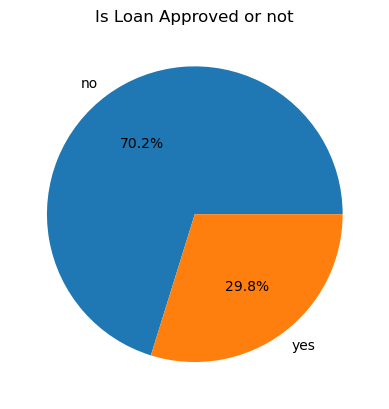

In [30]:
class_loan = df["Loan_Approved"].value_counts()

plt.pie(class_loan, labels=['no', 'yes'], autopct="%1.1f%%")
plt.title("Is Loan Approved or not")

[Text(0, 0, '621'), Text(0, 0, '379')]

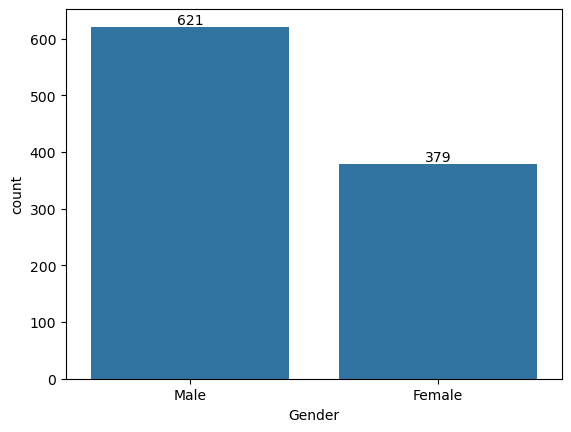

In [31]:
gender = df["Gender"].value_counts()

ax = sns.barplot(gender)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

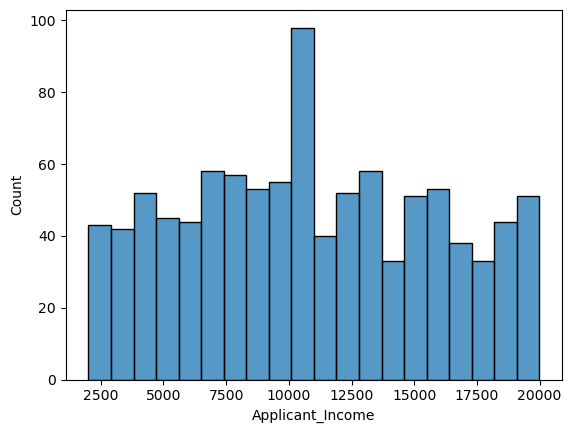

In [32]:
sns.histplot(data=df, x="Applicant_Income", bins = 20) 

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

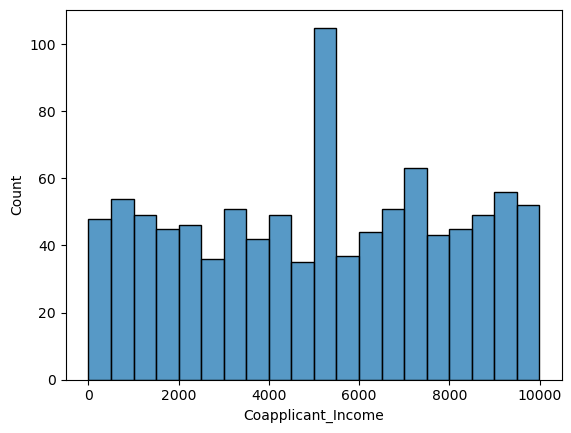

In [33]:
sns.histplot(data=df, x="Coapplicant_Income", bins = 20) 

/opt/anaconda3/lib/python3.13/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

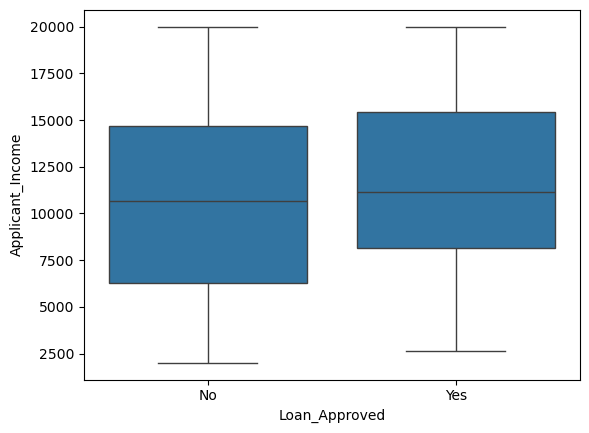

In [34]:
sns.boxplot(data=df, x="Loan_Approved", y="Applicant_Income")

/opt/anaconda3/lib/python3.13/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


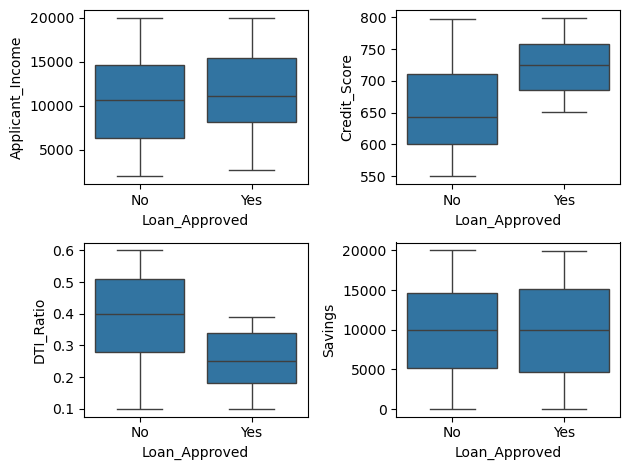

In [35]:
fig, axes = plt.subplots(2,2)

sns.boxplot(ax=axes[0,0], x=df["Loan_Approved"], y=df["Applicant_Income"])
sns.boxplot(ax=axes[0,1], x=df["Loan_Approved"], y=df["Credit_Score"])
sns.boxplot(ax=axes[1,0], x=df["Loan_Approved"], y=df["DTI_Ratio"])
sns.boxplot(ax=axes[1,1], x=df["Loan_Approved"], y=df["Savings"])

plt.tight_layout()

/opt/anaconda3/lib/python3.13/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.13/site-packages/seaborn/_base.py:948: Futu

<Axes: xlabel='Credit_Score', ylabel='Count'>

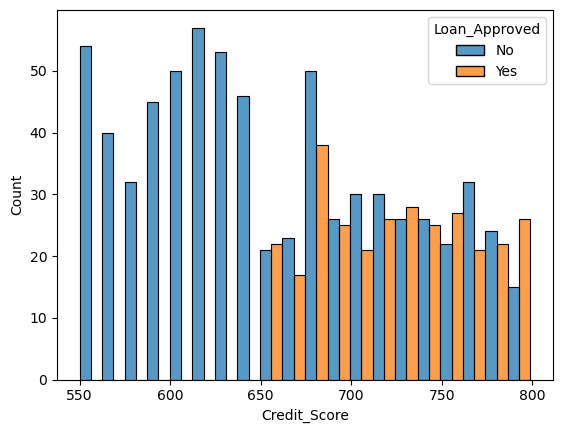

In [39]:
sns.histplot(data=df, x="Credit_Score", hue="Loan_Approved", bins = 20, multiple="dodge") 

## Encoding

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        1000 non-null   float64
 1   Applicant_Income    1000 non-null   float64
 2   Coapplicant_Income  1000 non-null   float64
 3   Employment_Status   1000 non-null   object 
 4   Age                 1000 non-null   float64
 5   Marital_Status      1000 non-null   object 
 6   Dependents          1000 non-null   float64
 7   Credit_Score        1000 non-null   float64
 8   Existing_Loans      1000 non-null   float64
 9   DTI_Ratio           1000 non-null   float64
 10  Savings             1000 non-null   float64
 11  Collateral_Value    1000 non-null   float64
 12  Loan_Amount         1000 non-null   float64
 13  Loan_Term           1000 non-null   float64
 14  Loan_Purpose        1000 non-null   object 
 15  Property_Area       1000 non-null   object 
 16  Educati

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])

In [49]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index=df.index)

df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)

In [53]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4.0,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_ID                     1000 non-null   float64
 1   Applicant_Income                 1000 non-null   float64
 2   Coapplicant_Income               1000 non-null   float64
 3   Age                              1000 non-null   float64
 4   Dependents                       1000 non-null   float64
 5   Credit_Score                     1000 non-null   float64
 6   Existing_Loans                   1000 non-null   float64
 7   DTI_Ratio                        1000 non-null   float64
 8   Savings                          1000 non-null   float64
 9   Collateral_Value                 1000 non-null   float64
 10  Loan_Amount                      1000 non-null   float64
 11  Loan_Term                        1000 non-null   float64
 12  Education_Level      

## Heatmap

In [55]:
num_cols = df.select_dtypes(include="number")
corr_matrix = num_cols.corr()

In [56]:
corr_matrix

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
Applicant_ID,1.000000,0.020970,0.041140,0.014579,0.012495,-0.028170,0.024995,0.000174,0.022692,0.031759,...,0.005426,-0.039878,0.019178,0.012969,-0.030187,0.036067,0.005906,-0.074056,0.022803,0.038417
Applicant_Income,0.020970,1.000000,0.007545,-0.023988,-0.026658,-0.009818,-0.010457,-0.009107,-0.028358,0.018789,...,0.032794,0.074209,-0.031234,0.004845,-0.036260,-0.020871,-0.025011,0.102589,-0.044639,-0.011995
Coapplicant_Income,0.041140,0.007545,1.000000,0.014306,-0.026733,0.058423,0.012418,0.058078,-0.015047,0.009457,...,0.028000,0.016022,0.059549,-0.010058,0.030045,-0.010148,-0.001146,0.037640,0.004312,-0.047929
Age,0.014579,-0.023988,0.014306,1.000000,-0.018767,-0.004212,0.023330,0.007903,-0.000986,0.037382,...,-0.006283,0.029865,0.037293,0.003100,-0.025661,0.048402,-0.066041,0.021232,-0.012960,0.072462
Dependents,0.012495,-0.026658,-0.026733,-0.018767,1.000000,-0.007687,-0.026338,0.011498,-0.004981,0.023004,...,-0.044642,0.027343,-0.005785,-0.032278,0.024082,0.013706,-0.009250,-0.018757,0.030197,-0.054147
Credit_Score,-0.028170,-0.009818,0.058423,-0.004212,-0.007687,1.000000,-0.007130,0.002338,-0.065353,0.007865,...,0.026013,-0.008658,0.015324,-0.006946,0.004445,-0.039739,-0.007076,0.066736,-0.000049,-0.046087
Existing_Loans,0.024995,-0.010457,0.012418,0.023330,-0.026338,-0.007130,1.000000,0.047008,0.034435,-0.049916,...,-0.010035,0.001777,0.023212,-0.053971,0.035629,-0.038762,-0.009642,0.030520,-0.019306,0.045391
DTI_Ratio,0.000174,-0.009107,0.058078,0.007903,0.011498,0.002338,0.047008,1.000000,0.004663,-0.009622,...,0.040432,-0.014125,-0.036648,0.044898,-0.006156,0.009624,-0.007214,0.002090,-0.003506,0.026018
Savings,0.022692,-0.028358,-0.015047,-0.000986,-0.004981,-0.065353,0.034435,0.004663,1.000000,0.015481,...,0.032558,-0.012217,-0.028948,0.005438,0.016833,-0.006667,-0.011683,0.004381,-0.030208,0.027178
Collateral_Value,0.031759,0.018789,0.009457,0.037382,0.023004,0.007865,-0.049916,-0.009622,0.015481,1.000000,...,0.040406,-0.050975,-0.007120,0.020061,0.007975,0.000897,0.035760,-0.013464,-0.014480,-0.009655


In [57]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Applicant_ID                      -0.011167
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed    

In [60]:
df.drop(columns=['Applicant_ID'], inplace=True)

<Axes: >

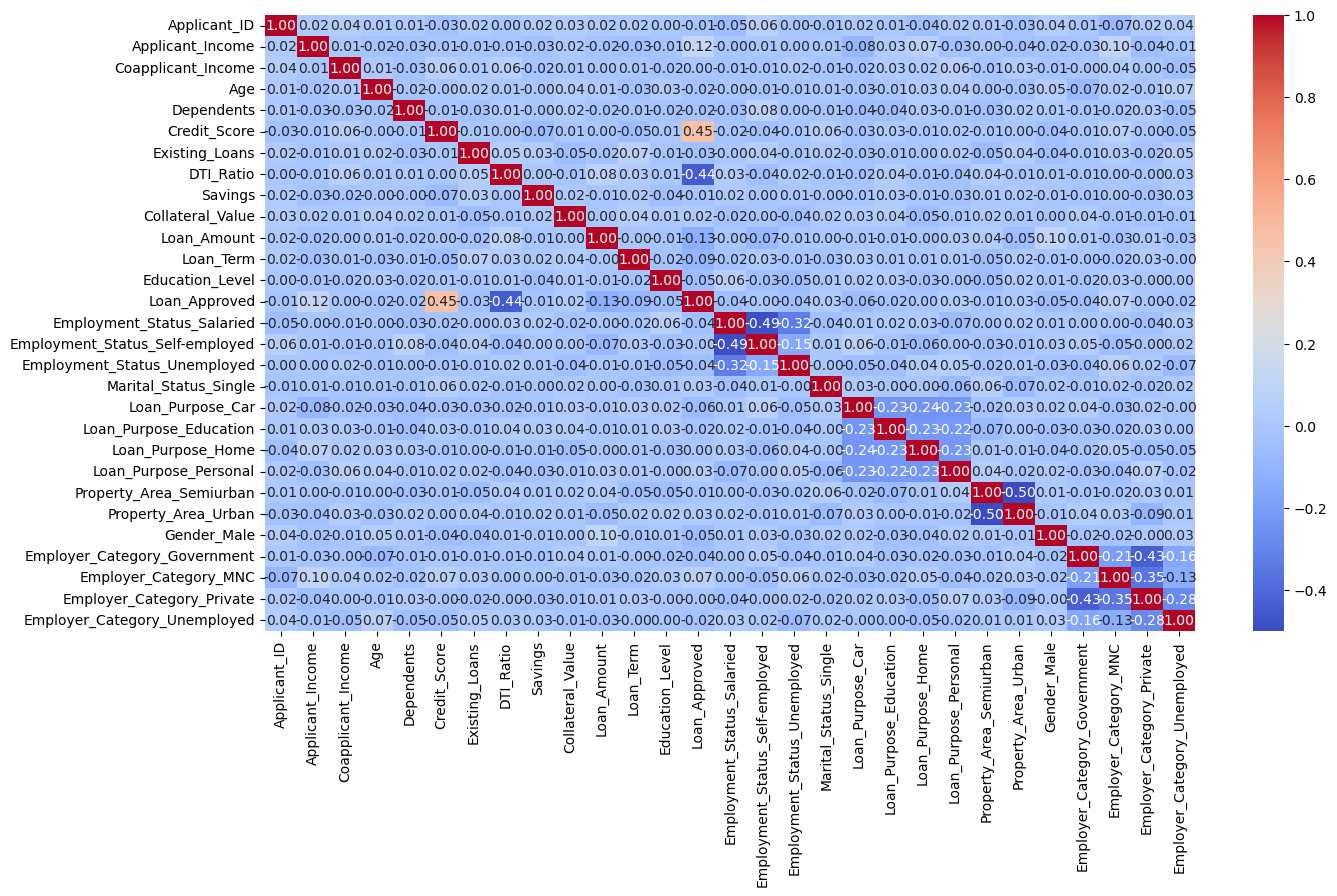

In [62]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

## Train Test Split & Feature Scaling

In [63]:
X = df.drop("Loan_Approved", axis=1)
y = df["Loan_Approved"]

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
X_test_scaled

array([[ 0.42610546,  0.55091079,  1.19037073, ..., -0.41388776,
         1.16316   , -0.30723158],
       [ 1.00971366,  0.58995935,  0.18392964, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.67557096, -0.54558674,  1.09887608, ..., -0.41388776,
         1.16316   , -0.30723158],
       ...,
       [-0.67980585, -0.10106072,  1.28186537, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.37650705, -0.97825874, -0.54802752, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [-0.73647272, -1.24497436,  0.73289751, ..., -0.41388776,
         1.16316   , -0.30723158]])

## Model Training

In [77]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [78]:
y_pred = log_model.predict(X_test_scaled)

In [79]:
# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1 score:  0.7768595041322314
Accuracy:  0.865
CM:
 [[126  13]
 [ 14  47]]


In [80]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.6274509803921569
Recall:  0.5245901639344263
F1 score:  0.5714285714285714
Accuracy:  0.76
CM:  [[120  19]
 [ 29  32]]


In [81]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.8035714285714286
Recall:  0.7377049180327869
F1 score:  0.7692307692307693
Accuracy:  0.865
CM:  [[128  11]
 [ 16  45]]


## Feature Engineering

In [82]:
# Add or Tranform features
df["DTI_Ratio_sq"] = df["DTI_Ratio"] ** 2
df["Credit_Score_sq"] = df["Credit_Score"] ** 2

In [83]:
# df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

X = df.drop(columns=["Loan_Approved", "Credit_Score", "DTI_Ratio"])
y = df["Loan_Approved"]

In [84]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7903225806451613
Recall:  0.8032786885245902
F1 score:  0.7967479674796748
Accuracy:  0.875
CM:  [[126  13]
 [ 12  49]]


In [86]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.62
Recall:  0.5081967213114754
F1 score:  0.5585585585585585
Accuracy:  0.755
CM:  [[120  19]
 [ 30  31]]


In [87]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1 score:  0.7768595041322314
Accuracy:  0.865
CM:  [[126  13]
 [ 14  47]]
